In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_FILE = "Bank_Personal_Loan_Modelling.xlsx"
ZIP_COUNTY_FILE = "ZIP_County.csv"

df = pd.read_excel(DATA_FILE, sheet_name='Data')

print(df.columns)
print(df.head(5))

zips = pd.read_csv(ZIP_COUNTY_FILE)
print(zips.columns)
print(zips.head(5))

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0     

In [3]:
df.info()
df[['Age', 'Income', 'CCAvg']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,Age,Income,CCAvg
count,5000.000000,5000.000000,5000.000000
mean,45.338400,73.774200,1.937913
std,11.463166,46.033729,1.747666
min,23.000000,8.000000,0.000000
25%,35.000000,39.000000,0.700000
50%,45.000000,64.000000,1.500000
75%,55.000000,98.000000,2.500000
max,67.000000,224.000000,10.000000


In [4]:
df[df['Personal Loan']==1][['Age', 'Income', 'CCAvg']].describe()

,Age,Income,CCAvg
count,480.000000,480.000000,480.000000
mean,45.066667,144.745833,3.905347
std,11.590964,31.584429,2.097679
min,26.000000,60.000000,0.000000
25%,35.000000,122.000000,2.600000
50%,45.000000,142.500000,3.800000
75%,55.000000,172.000000,5.350000
max,65.000000,203.000000,10.000000


In [5]:
df.isna().sum() # my data file version is probably different from the one in the exercise, because mine has no NA vals

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
sum(df.duplicated(subset=['ID']))

0

In [7]:
df = df.drop(['ID'], axis=1)
df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df = pd.merge(df, zips, how='inner', on='ZIP Code')
df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County Name
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Mateo County


In [9]:
print("Shape before filtration: ", df.shape)
df = df[df['Experience']>0]
print("Shape after filtration: ", df.shape)

Shape before filtration:  (5376, 14)
Shape after filtration:  (5247, 14)


Text(0, 0.5, 'Count')

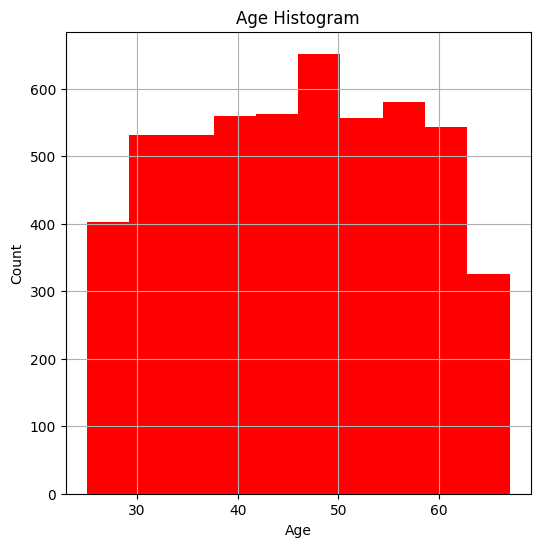

In [34]:
ax = df.hist(column='Age', color='r', figsize=(6,6))[0][0]
ax.set_title('Age Histogram')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

Text(0, 0.5, 'Box Representation')

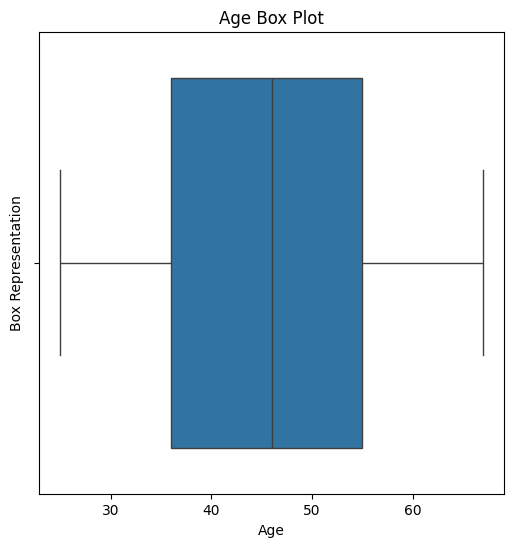

In [36]:
fig = plt.figure(figsize=(6,6))
ax = sns.boxplot(x=df['Age'])
ax.set_title('Age Box Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Box Representation')


Text(0, 0.5, 'Distribution')

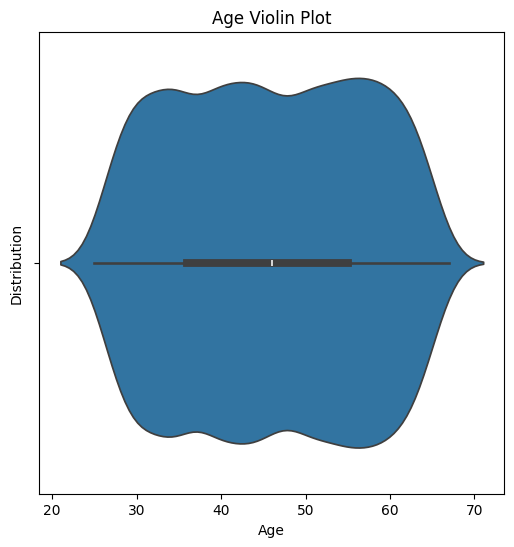

In [37]:
fig = plt.figure(figsize=(6,6))
ax = sns.violinplot(x=df['Age'])
ax.set_title('Age Violin Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Distribution')

<Axes: xlabel='Education', ylabel='count'>

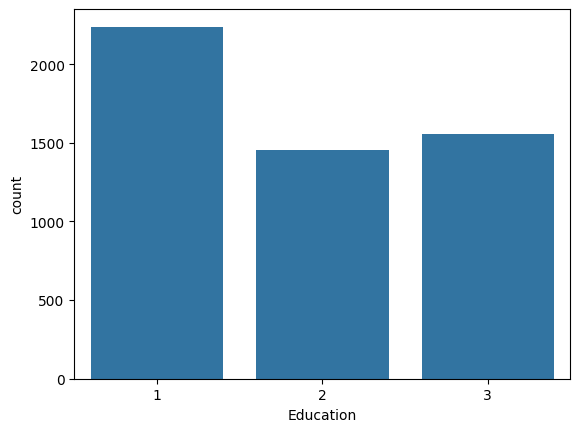

In [38]:
sns.countplot(x='Education', data=df)

<Axes: xlabel='Education', ylabel='count'>

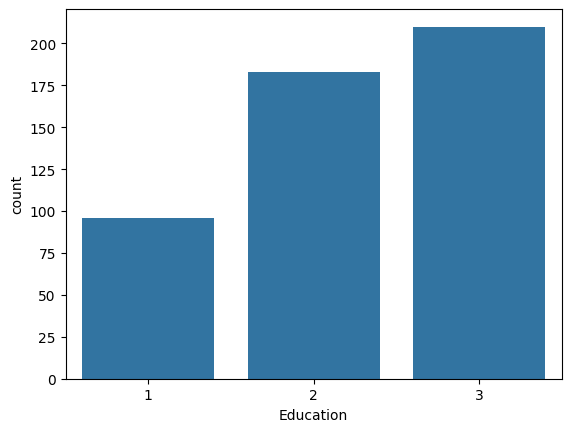

In [39]:
sns.countplot(x='Education', data=df[df['Personal Loan']==1])

Text(0, 0.5, 'Number of Occurrences')

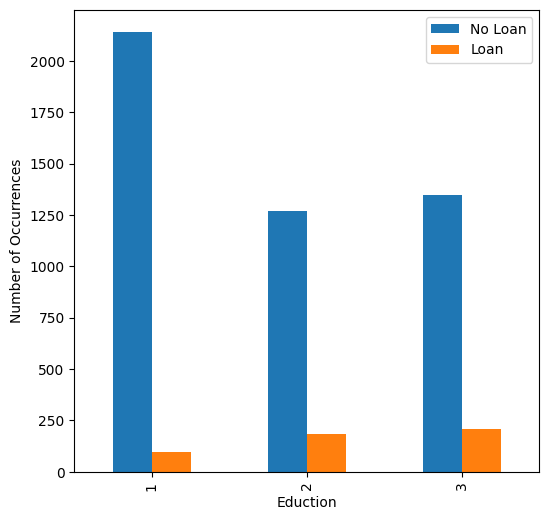

In [44]:
ax = pd.crosstab(df['Education'], df['Personal Loan']).plot(kind='bar', figsize=(6,6))
ax.legend(['No Loan', 'Loan'])
ax.set_xlabel('Eduction')
ax.set_ylabel('Number of Occurrences')

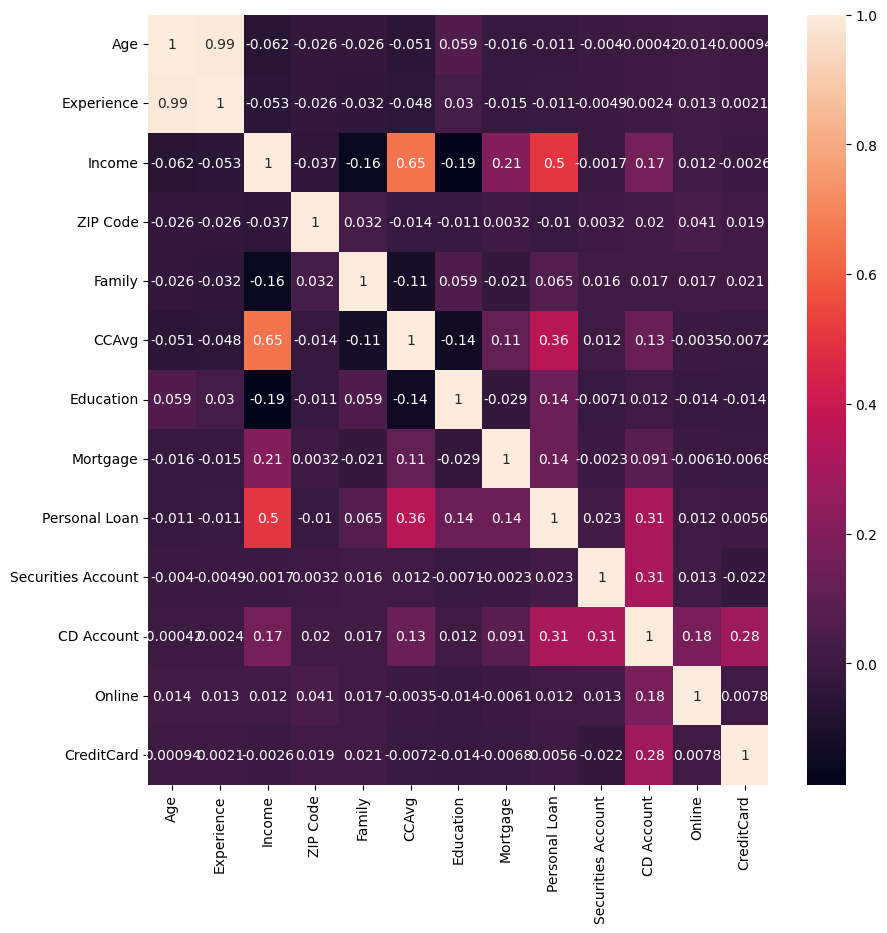

In [46]:
df_numerical = df.drop('County Name', axis=1)
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(df_numerical.corr(), annot=True)

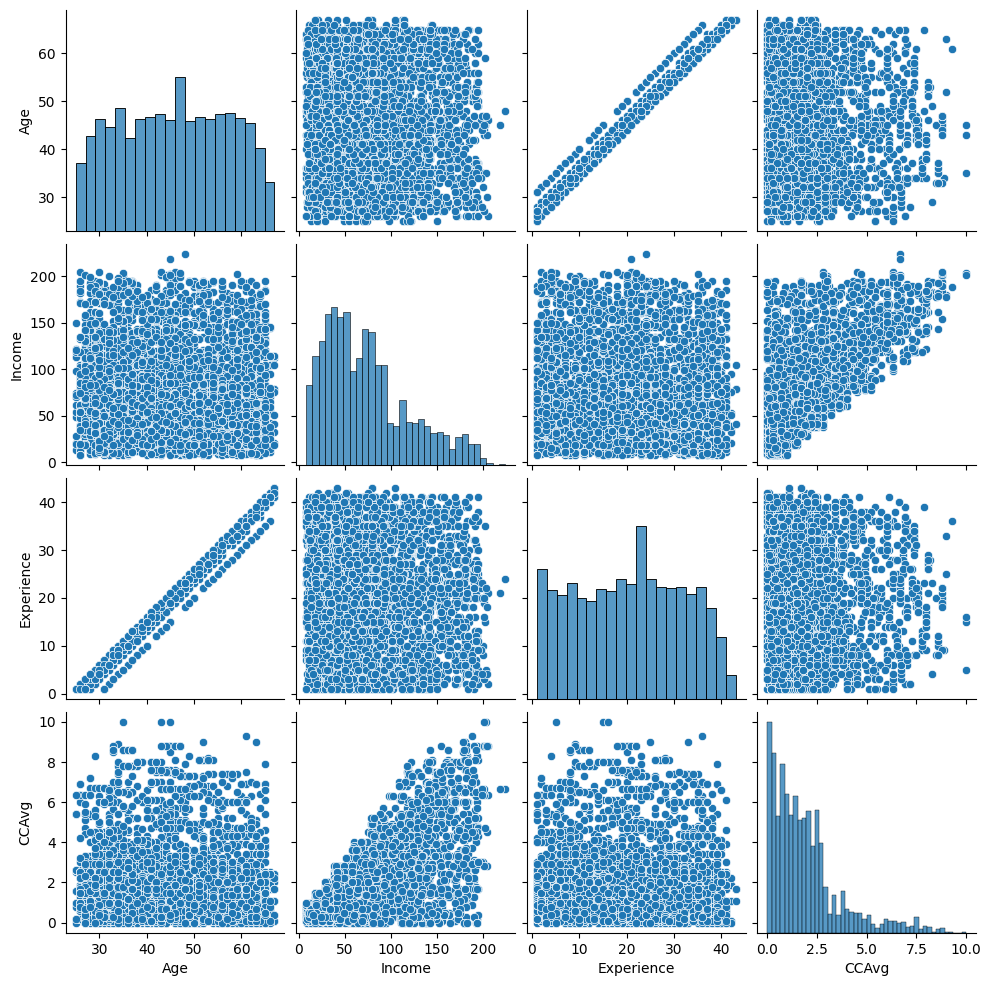

In [47]:
sns.pairplot(df[['Age', 'Income', 'Experience', 'CCAvg']])